## Machine Learning: Regression - Predicting Energy Efficiency of Buildings  QUIZ FOR STAGE A

#### Hello Hamoye Team,

#### My name is  David Olatunji,and this is my simple solution code for Quiz for stage B. 
 
#### Regards,
#### Ibukunoluwa.

Importing the necessary libraries for the quiz.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Importing my local path/ directory

In [2]:
import os, sys
os.listdir()

['.ipynb_checkpoints', 'energydata_complete.csv', 'MyQuizStageB.ipynb']

Loading data from my local directory

In [3]:
data_set = pd.read_csv('energydata_complete.csv')
data_set.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Describing the dataset

In [4]:
data_set.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
data_set.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [7]:
sum(data_set.isnull().sum()) #checking for Nan values

0

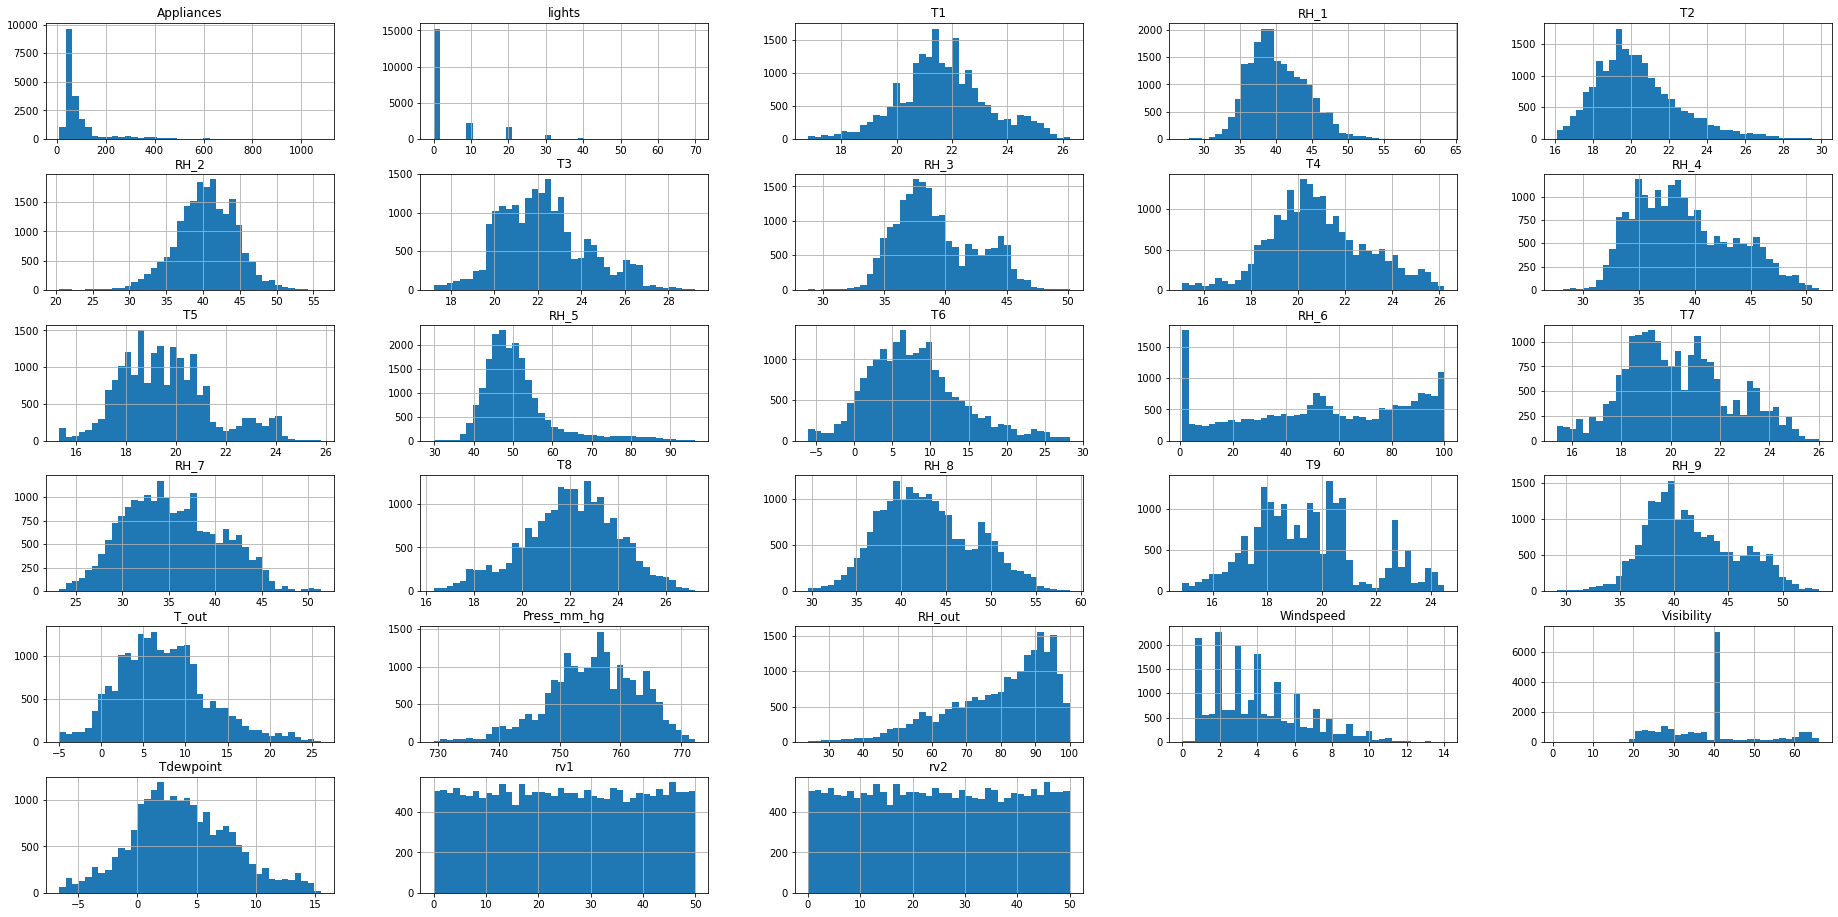

In [8]:
# checking the distribution of the dataset
data_set.hist(bins=40,figsize=(32,16))
plt.show() 

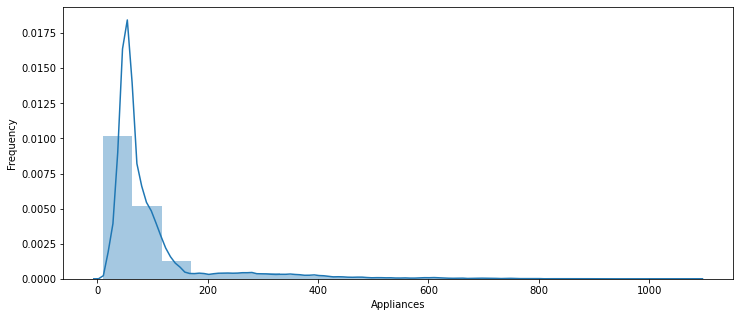

A normal distribution is obtained


In [9]:
# Distribution of values in Applainces column
plt.figure(figsize=(12,5))
plt.xlabel('Appliance')
plt.ylabel('Frequency')
sns.distplot(data_set['Appliances'] , bins=20 )
plt.show()
print('A normal distribution is obtained')

<AxesSubplot:>

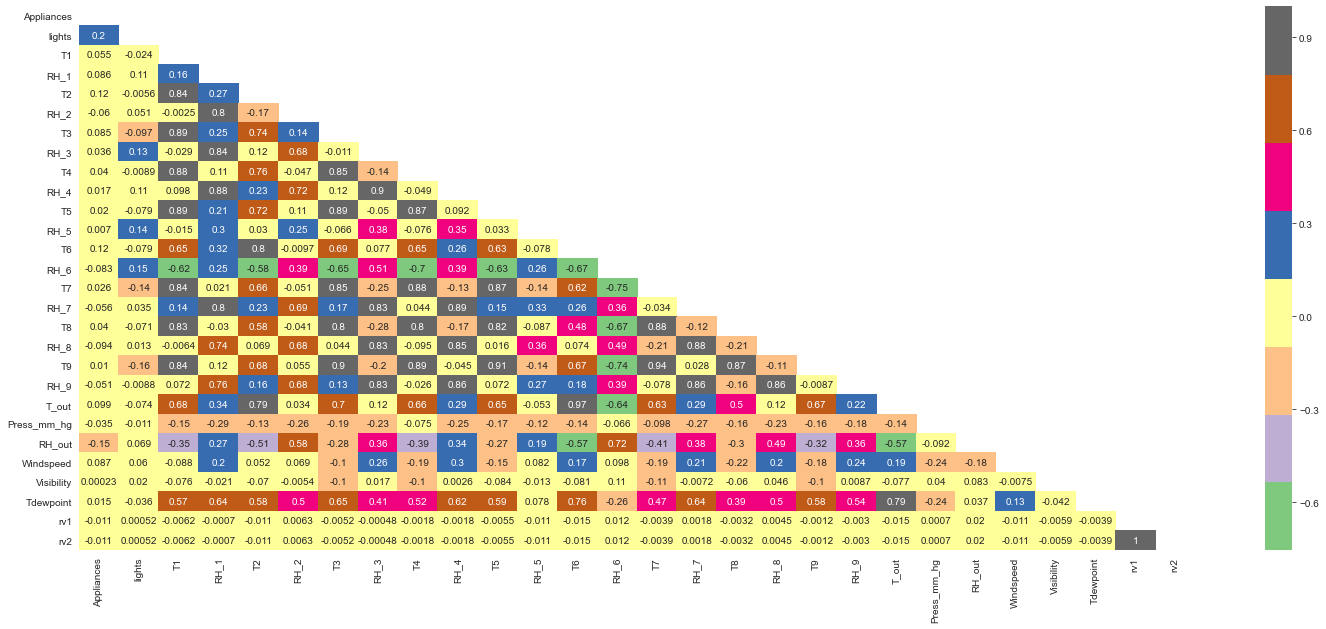

In [10]:
corre=data_set.corr()
matrix = np.triu(corre)
plt.figure(figsize=(25,10))
sns.set_style("whitegrid")
sns.heatmap(corre, annot=True , mask=matrix, cmap='Accent')

In [11]:
data_set=data_set.drop(['lights','date'],axis='columns')
scaler = MinMaxScaler() 
scalerfit=scaler.fit_transform(data_set)
data_set2=pd.DataFrame(scalerfit,columns=data_set.columns)

C:\Users\HP 1011 x2\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
X = data_set2.drop(columns=['Appliances'])
y=data_set2['Appliances']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
def get_weights(model, X, y, weights_name):
    cols = X.columns
    model.fit(X, y)
    weights = model.coef_
    return pd.DataFrame({'features': cols, weights_name: weights}).sort_values(by=weights_name)

In [14]:
model=LinearRegression()
model_weights = get_weights(model, X_train, y_train, 'model_weights')
model.fit(X_train,y_train)
prediction=model.predict(X_test)

## Question 12


In [15]:
x = data_set[['T2']]
Y = data_set[['T6']]

In [16]:
x_train, x_test,Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state = 42)
model=LinearRegression()
model.fit(x_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
r2=model.score(x_test,Y_test)
print('r2_score = ',r2.round(2))

r2_score =  0.64


## Question 13

In [18]:
MAE = mean_absolute_error(y_test, prediction)
round(MAE, 2)

0.05

## Question 14

In [19]:
RSS = np.sum(np.square(y_test - prediction))
round(RSS, 2)

45.35

## Question 15

In [20]:
RMSE = np.sqrt(mean_squared_error(y_test, prediction))
round(RMSE, 3)

0.088

## Question 16

In [21]:
# R-SQUARED(COEFFICIENT OF DETERMINATION)
COD = r2_score(y_test,prediction)
round(COD, 2)

0.15

## Question 17


In [22]:
print([model_weights['features'].iloc[0], model_weights['features'].iloc[-1]])

['RH_2', 'RH_1']


## Question 18


In [23]:
ridge2=Ridge(alpha=0.4)
ridge2.fit(X_train,y_train)
predictNew=ridge2.predict(X_test)
NewMSE=mean_squared_error(y_test,predictNew)
NewRMSE=NewMSE**0.5
print (round(NewRMSE,3))
#There is no change to the RMSE 

0.088


## Question 19


In [24]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
print (np.sum(lasso.coef_!=0)) # Answer is 4

4


## Question 20


In [25]:
ypred2=lasso.predict(X_test)
mse=mean_squared_error(ypred2,y_test)
rmse=mse**0.5
print ('The Root Mean Squared Error for Lasso Regression is:',round(rmse,3))

The Root Mean Squared Error for Lasso Regression is: 0.094
